# 1. Setup and load the data`

In [2]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 2.6/385.2 MB 12.5 MB/s eta 0:00:31
    --------------------------------------- 5.2/385.2 MB 13.3 MB/s eta 0:00:29
    --------------------------------------- 7.9/385.2 MB 13.2 MB/s eta 0:00:29
   - -------------------------------------- 10.7/385.2 MB 13.2 MB/s eta 0:00:29
   - -------------------------------------- 13.1/385.2 MB 12.8 MB/s eta 0:00:29
   - -------------------------------------- 16.0/385.2 MB 12.9 MB/s eta 0:00:29
   - -------------------------------------- 18.6/385.2 MB 12.9 MB/s eta 0:00:29
   -- ------------------------------------- 21.2/385.2 MB 13.0 MB/s

In [2]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 871.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 3.1 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/1.8 MB 6.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.8 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.6.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
flatbuffers               24.3.25
fonttools                 4.53.1
fqdn                      1.5.1
gast                      0.6.0
google-pasta   

In [57]:
import tensorflow as tf
import os

In [58]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy images

In [59]:
import cv2
import imghdr

In [60]:
data_dir = 'data'

In [61]:
os.listdir(data_dir)

['angry', 'calm', 'confused', 'happy', 'sad']

In [62]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '383627315.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '847a11866cbc10cddc6e32f6942be6c5.jpg',
 '8cEbMbgxi.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'a-group-of-happy-people-at-sunset-on-the-nature-WBAH9W.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'businesswoman-giving-high-five-male-260nw-2226244055

In [63]:
image_exts = ['jpeg','jpg','bmp','png']

In [64]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\angry\30460189.jpg
Image not in ext list data\angry\86917520.jpg
Image not in ext list data\angry\Angry-Sadhu.jpg
Image not in ext list data\angry\depositphotos_223033032-stock-photo-angry-screaming-young-girl-portrait.jpg
Image not in ext list data\angry\How-To-Deal-With-An-Angry-Spouse-Banner-1.jpg.webp
Image not in ext list data\calm\iStock-478921850-2.jpg
Image not in ext list data\confused\51347447.jpg
Image not in ext list data\confused\96845260.jpg
Image not in ext list data\confused\depositphotos_166935328-stock-photo-confused-woman-with-shrug-gesture.jpg
Image not in ext list data\confused\depositphotos_19311329-stock-photo-man-is-confused.jpg
Image not in ext list data\confused\depositphotos_322022556-stock-photo-confused-man-have-to-choose.jpg


# Load data

In [65]:
import numpy as np
from matplotlib import pyplot as plt

In [66]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 450 files belonging to 5 classes.


In [67]:

data_iterator = data.as_numpy_iterator()

In [68]:
batch = data_iterator.next()

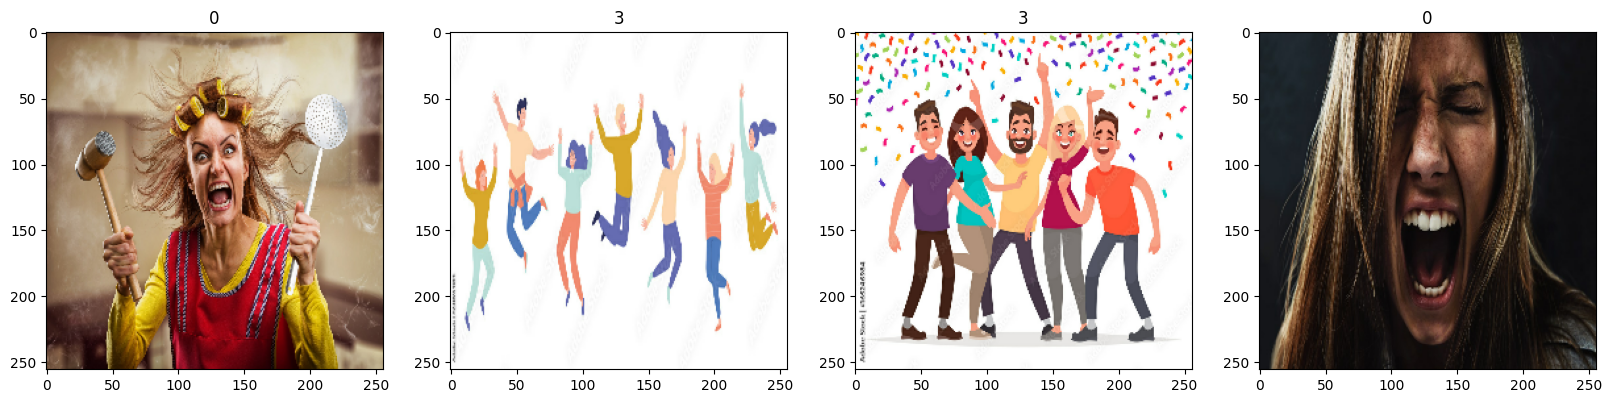

In [69]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale data

In [70]:
data = data.map(lambda x,y: (x/255, y))

In [71]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# Split data

In [72]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [73]:

train_size

10

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [76]:

model = Sequential()

In [77]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [79]:

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [80]:

logdir='logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 609ms/step - accuracy: 0.1900 - loss: -66.6433 - val_accuracy: 0.3333 - val_loss: -517.6685
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 555ms/step - accuracy: 0.2200 - loss: -1667.6365 - val_accuracy: 0.2188 - val_loss: -7773.8032
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 545ms/step - accuracy: 0.1930 - loss: -15524.0938 - val_accuracy: 0.2188 - val_loss: -46501.7305
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 579ms/step - accuracy: 0.1915 - loss: -95099.8047 - val_accuracy: 0.2188 - val_loss: -312174.7812
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 615ms/step - accuracy: 0.2033 - loss: -487076.3125 - val_accuracy: 0.2708 - val_loss: -1354346.5000
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.1859 - loss: -1763841.1250 - val_accuracy: 0.2396 - val_loss: -3789360.7500
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2418s 269s/step - accuracy: 0.2066 - loss: -5876895.0000 - val_accuracy: 0.1875 - val_loss: -13191336.0000
Epoch 8/20
10/10 ━━━━━━━━

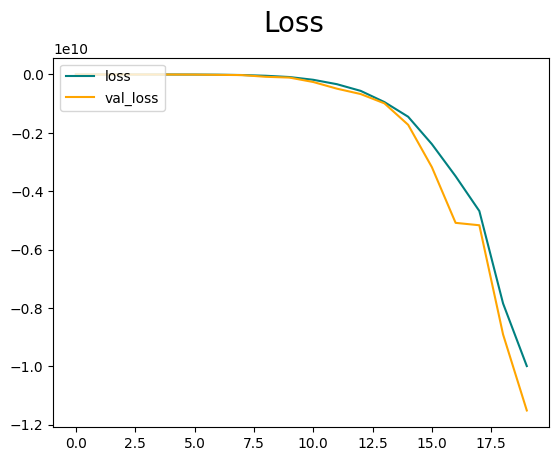

In [83]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

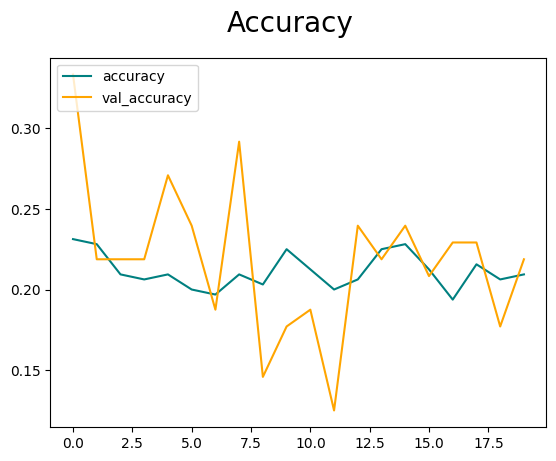

In [84]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [85]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [86]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [87]:

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


In [88]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8125, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.28125, shape=(), dtype=float32)


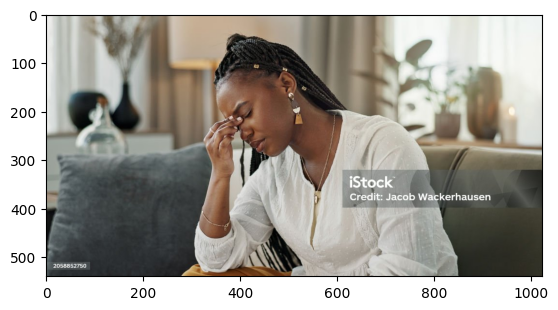

In [89]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

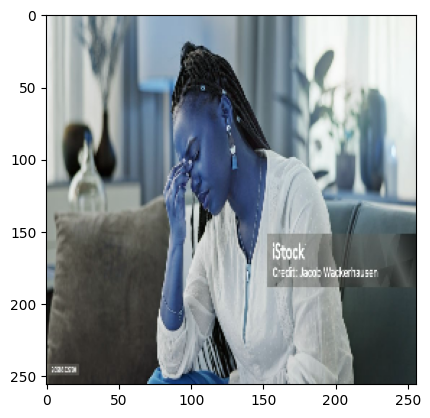

In [90]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


In [92]:
yhat

array([[1.]], dtype=float32)

In [48]:

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Save the model

In [49]:

from tensorflow.keras.models import load_model

In [52]:
from keras.saving import save_model

# Save the model in the new .keras format
save_model(model, 'my_model.keras')


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [55]:
from keras.models import load_model


# Load the model without compiling
model = load_model('my_model.keras', compile=False)


# Recompile the model with the desired optimizer and settings
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


array([[0.5601337]], dtype=float32)